# Graficos Comparativos

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    print("Agrego el src")

/home/apernin/.dev/tda_2023Q1/tp1/src
Agrego el src


In [2]:
import time
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from operator import itemgetter
from main import create_test_dataset, heap_sort, merge_sort, perform_time_test
#from main import heap_sort_2

In [3]:
def test_and_plot(initial_h, initial_k, max_iter, func, multi=2, pre_test=None):
    h = initial_h
    ts_h = []
    k = initial_k
    ts_k = []
    
    ns_k = []
    ns_h = []
    
    ops_k = []
    ops_h = []
    
    n = 0
    
    while n < max_iter:
        # Fijo "n"
        ns_k.append((initial_h, k, initial_h*k))
        # Primero fijo h y pruebo k
        dataset = create_test_dataset(k=k, h=initial_h)
        if pre_test:
            dataset = pre_test(dataset)
        _, t, ops = perform_time_test(func, dataset)
        ts_k.append(t)
        ops_k.append(ops)
        #print(f"En la variona de K tengo h:{initial_h}, k:{k} entonces n: {initial_h*k}")
        
        k *= multi
        
        # Ahora fijo k y pruebo h
        dataset = create_test_dataset(k=initial_k, h=h)
        if pre_test:
            dataset = pre_test(dataset)
        _, t, ops = perform_time_test(func, dataset)
        ts_h.append(t)
        ops_h.append(ops)
        ns_h.append((h, initial_k, h*initial_k))
        #print(f"En la variona de H tengo h:{h}, k:{initial_k} entonces n: {h*initial_k}")
        
        h *= multi
        
        n += 1
    
    plt.plot(list(map(itemgetter(2), ns_k)), ts_k, label='Variacion-k')
    plt.plot(list(map(itemgetter(2), ns_h)), ts_h, label='Variacion-h')
    plt.title(f"Tiempo en funcion variacion k-h de {func.__name__}")
    plt.xlabel("Elementos Totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    
    plt.plot(list(map(itemgetter(2), ns_k)), ops_k, label='Variacion-k')
    plt.plot(list(map(itemgetter(2), ns_h)), ops_h, label='Variacion-h')
    plt.title(f"Operaciones en funcion variacion k-h de {func.__name__}")
    plt.xlabel("Elementos Totales")
    plt.ylabel("Operaciones Realizadas")
    plt.legend()
    plt.show()
    
    hs_k, ks_k, nns_k = list(zip(*ns_k))
    hs_h, ks_h, nns_h = list(zip(*ns_h))
    
    #df_k = pd.DataFrame({'n': nns_k, 'h': hs_k, 'k': ks_k, 'time': ts_k, 'ops': ops_k})
    
    df_k = pd.DataFrame({'n': nns_k, 'h': hs_k, 'k': ks_k, 'time': ts_k, 'ops': ops_k, 'var': 'k'})
    df_h = pd.DataFrame({'n': nns_h, 'h': hs_h, 'k': ks_h, 'time': ts_h, 'ops': ops_h, 'var': 'h'})
    
    df_res = pd.concat([df_k, df_h])
    df_res.sort_values(by=['n', 'h'], ascending=[True, True], inplace=True)
    
    return df_res

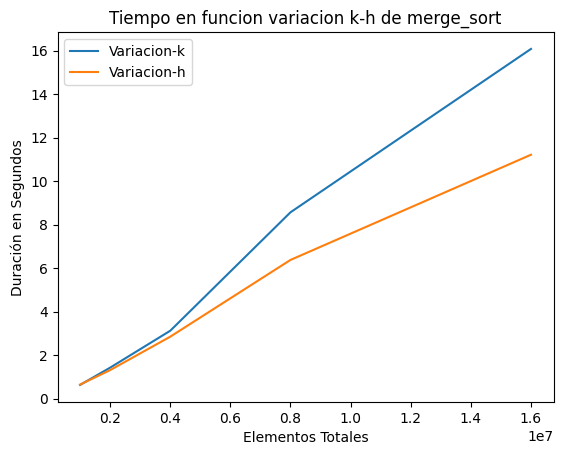

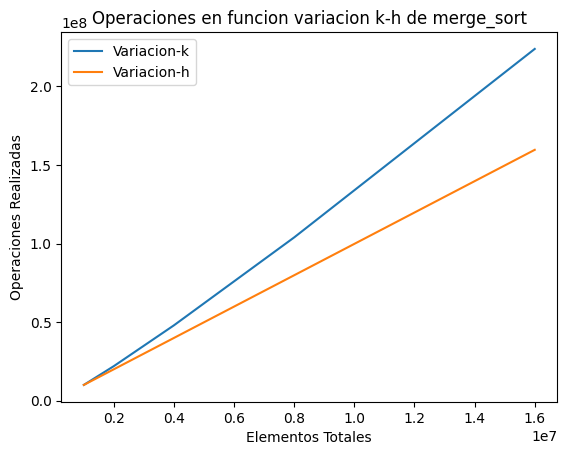

,n,h,k,time,ops,var
0,1000000,1000,1000,0.634336,9986976,k
0,1000000,1000,1000,0.648805,9986976,h
1,2000000,1000,2000,1.428113,21975952,k
1,2000000,2000,1000,1.315633,19962976,h
2,4000000,1000,4000,3.124771,47955904,k
2,4000000,4000,1000,2.851319,39914976,h
3,8000000,1000,8000,8.568675,103919808,k
3,8000000,8000,1000,6.379415,79818976,h
4,16000000,1000,16000,16.077992,223855616,k
4,16000000,16000,1000,11.214062,159626976,h


In [6]:
test_and_plot(initial_h=1000, initial_k=1000, max_iter=5, func=merge_sort, multi=2)

## Evaluacion K-Merge Heaps

acorde al análisis hecho del código asumimos que la complejidad del algoritmo es

$O(n) = O(K*H * log(K))$

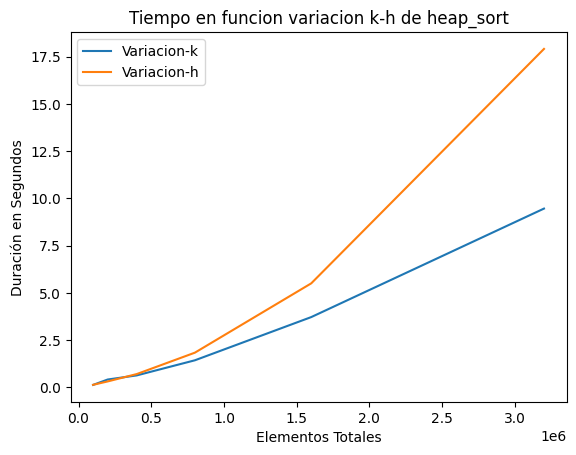

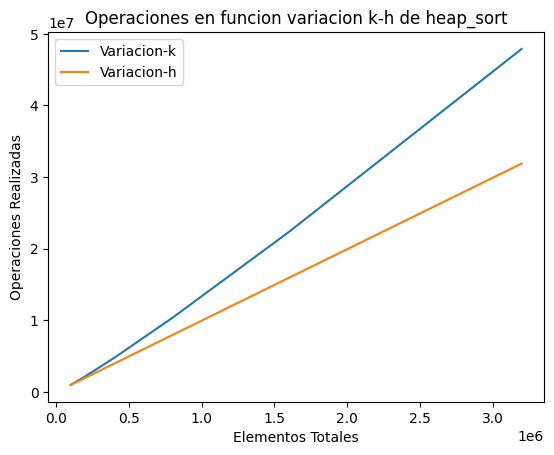

,n,h,k,time,ops,var
0,100000,100,1000,0.125201,9.965784e+05,k
0,100000,100,1000,0.130545,9.965784e+05,h
1,200000,100,2000,0.410757,2.193157e+06,k
1,200000,200,1000,0.309556,1.993157e+06,h
2,400000,100,4000,0.628895,4.786314e+06,k
2,400000,400,1000,0.699579,3.986314e+06,h
3,800000,100,8000,1.428672,1.037263e+07,k
3,800000,800,1000,1.832691,7.972627e+06,h
4,1600000,100,16000,3.716069,2.234525e+07,k
4,1600000,1600,1000,5.502319,1.594525e+07,h


In [5]:
test_and_plot(initial_h=100, initial_k=1000, max_iter=6, func=heap_sort, multi=2)